<a href="https://colab.research.google.com/github/InduwaraGayashan001/PyTorch/blob/main/Instance_Segmentation_Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
# import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2
import random
import time
import os
import subprocess
import requests
import glob
np.random.seed(20)


# Extract Data

In [2]:
def download_file(url, save_name):
    if not os.path.exists(save_name):
        subprocess.run(['wget', url, '-O', save_name, '-q'])
# Create directory to donwload inference data.
inference_dir = 'inference_data'
os.makedirs(inference_dir, exist_ok=True)

In [4]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

COLORS = np.random.uniform(0, 255, size=(len(COCO_INSTANCE_CATEGORY_NAMES), 3))

# Load the Model

In [3]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(
    weights = torchvision.models.detection.MaskRCNN_ResNet50_FPN_Weights.DEFAULT
).eval()

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 142MB/s]


# Inference

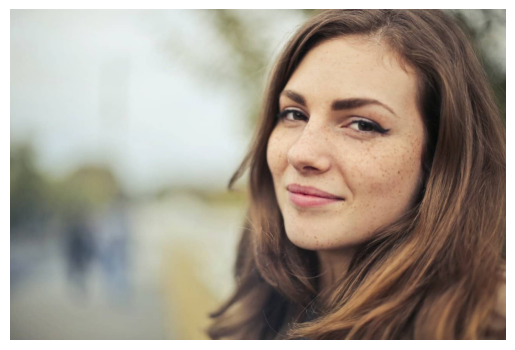

In [9]:
# Download the image and plotting it
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/person-1.jpg',
    os.path.join(inference_dir, 'person.jpg')
)

img = Image.open(os.path.join(inference_dir, 'person.jpg'))
plt.imshow(img)
plt.axis('off')
plt.show()


In [10]:
tranform = T.Compose([
    T.ToTensor()
])
img_tensor = tranform(img)
with torch.no_grad():
    pred = model([img_tensor])

In [11]:
pred[0]

{'boxes': tensor([[ 431.6028,    2.4547, 1280.0001,  851.2910],
         [ 119.3283,   43.6911,  862.8618,  853.0000]]),
 'labels': tensor([1, 1]),
 'scores': tensor([0.9998, 0.1074]),
 'masks': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0013, 0.0013, 0.0012],
           [0.0000, 0.0000, 0.0000,  ..., 0.0014, 0.0014, 0.0013],
           [0.0000, 0.0000, 0.0000,  ..., 0.0015, 0.0015, 0.0014],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.1385, 0.1310, 0.1234],
           [0.0000, 0.0000, 0.0000,  ..., 0.1301, 0.1230, 0.1159],
           [0.0000, 0.0000, 0.0000,  ..., 0.1216, 0.1150, 0.1083]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0

In [12]:
masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
masks.shape

(2, 853, 1280)

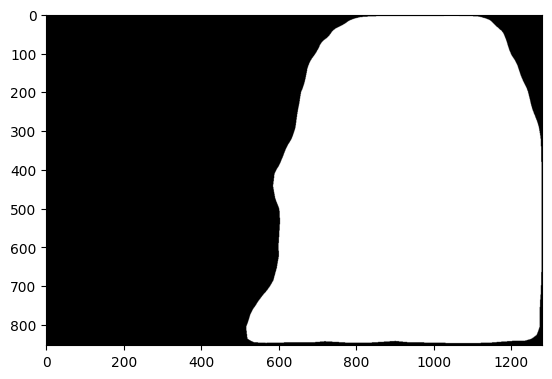

In [17]:
plt.imshow(masks[0], cmap="gray")
plt.show()

In [5]:
def random_color_mask(image, colors):

  r,g,b = np.zeros_like(image, dtype=np.uint8), np.zeros_like(image, dtype=np.uint8),np.zeros_like(image, dtype=np.uint8)

  r[image == 1], g[image == 1], b[image == 1] = colors[random.randint(0, len(colors) - 1)]

  return np.stack([r, g, b], axis=2)

def get_preditions(img_path, threshold):

  img = Image.open(img_path)

  img_tensor = T.ToTensor()(img)

  with torch.no_grad():
    pred = model([img_tensor])

  pred_data = pred[0]
  scores = pred_data['scores'].detach().cpu().numpy()
  labels = pred_data['labels'].detach().cpu().numpy()
  boxes = pred_data['boxes'].detach().cpu().numpy()
  masks = (pred_data['masks']>0.5).squeeze().detach().cpu().numpy()


  valid_indices = scores > threshold
  if not np.any(valid_indices):
    return [],[],[],[]

  pred_boxes = [[(b[0], b[1]), (b[2], b[3])] for b in boxes[valid_indices]]
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in labels[valid_indices]]
  masks = masks[valid_indices]

  return masks, pred_boxes, pred_class



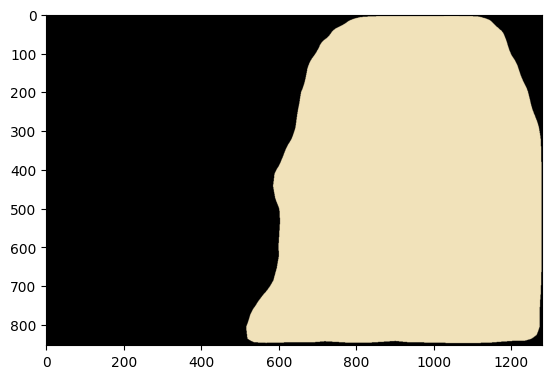

In [18]:
mask1 = random_color_mask(masks[0], COLORS)
plt.imshow(mask1)
plt.show()

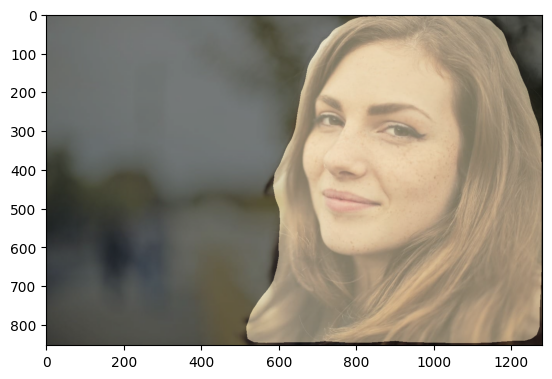

In [20]:
blend_img = cv2.addWeighted(np.array(img), 0.5, mask1, 0.5, 0)
plt.imshow(blend_img)
plt.show()

In [25]:
def instance_segmentation_api(img_path, threhold=0.5):
  masks, boxes, pred_cls = get_preditions(img_path, threhold)


  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


  rect_th = max(round(sum(img.shape) / 2 * 0.003), 2)
  text_th = max(rect_th - 1, 1)

  for i in range(len(masks)):

    p1,p2 = (int(boxes[i][0][0]), int(boxes[i][0][1])), (int(boxes[i][1][0]), int(boxes[i][1][1]))

    rgb_mask = random_color_mask(masks[i], COLORS)

    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)

    color = COLORS[COCO_INSTANCE_CATEGORY_NAMES.index(pred_cls[i])]


    cv2.rectangle(img, p1, p2, color, rect_th)

    w,h = cv2.getTextSize(pred_cls[i], 0, fontScale=rect_th/3, thickness=text_th)[0]
    outside = p1[1] -h >= 3

    p2 = (p1[0] + w, p1[1] - h - 3) if outside else (p1[0] + w, p1[1] + h + 3)

    cv2.rectangle(img, p1, p2, color=color, thickness=-1, lineType=cv2.LINE_AA)

    cv2.putText(
            img,
            pred_cls[i],
            (p1[0], p1[1] - 5 if outside else p1[1] + h + 2),
            cv2.FONT_HERSHEY_SIMPLEX,
            rect_th / 3,
            (255, 255, 255),
            thickness=text_th + 1
        )

  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.axis("off")  # Hide axis labels
  plt.show()

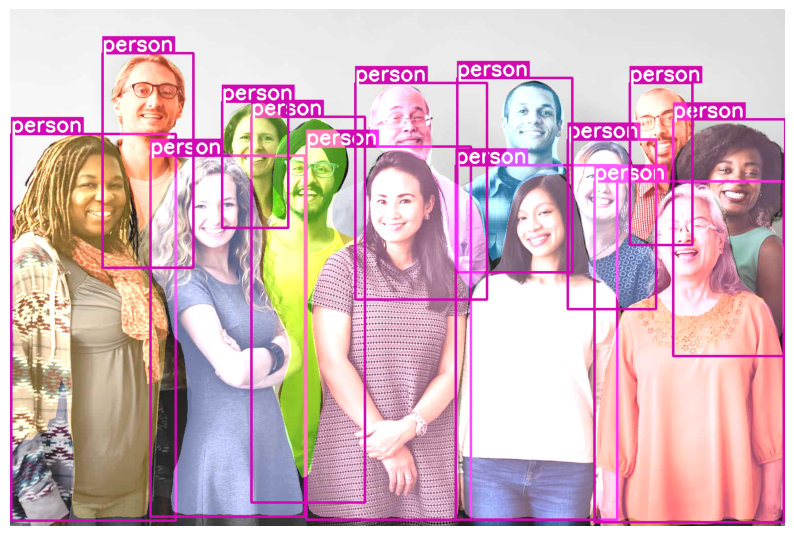

In [24]:
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/mrcnn_standing_people.jpg',
    os.path.join(inference_dir, 'mrcnn_standing_people.jpg')
)
instance_segmentation_api(os.path.join(inference_dir, 'mrcnn_standing_people.jpg'), 0.75)


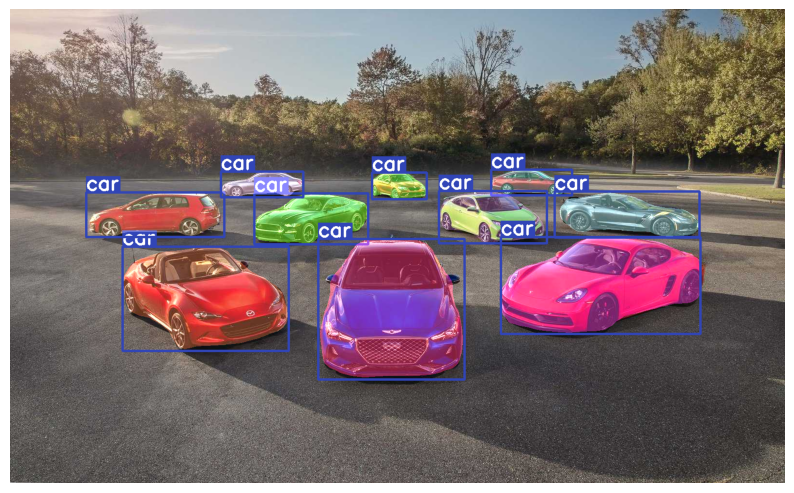

In [26]:
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/mrcnn_cars-scaled.jpg',
    os.path.join(inference_dir, 'mrcnn_cars.jpg')
)
instance_segmentation_api(os.path.join(inference_dir, 'mrcnn_cars.jpg'), 0.9)


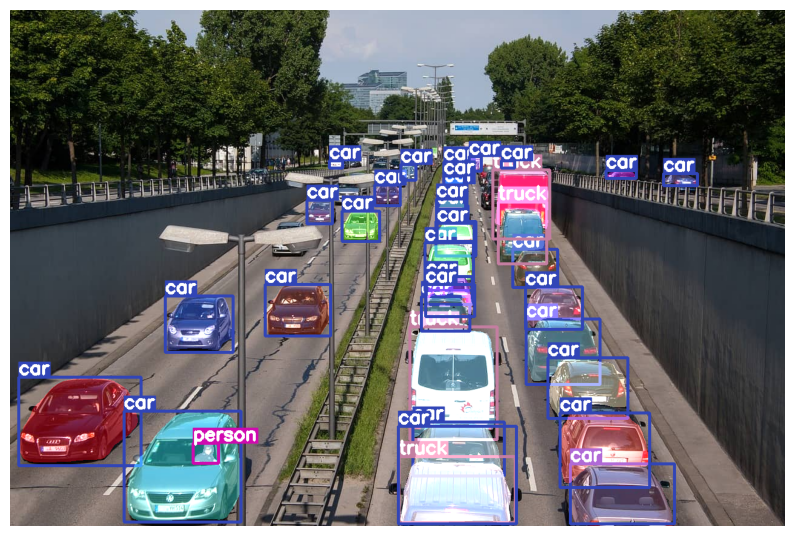

In [27]:
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/mrcnn-traffic.jpg',
    os.path.join(inference_dir, 'mrcnn-traffic.jpg')
)
instance_segmentation_api(os.path.join(inference_dir, 'mrcnn-traffic.jpg'), 0.6)


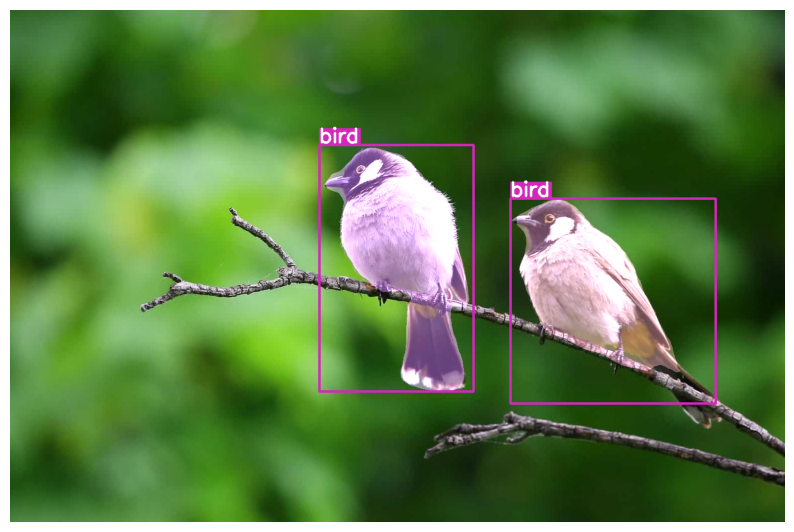

In [28]:
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/mrcnn-birds.jpg',
    os.path.join(inference_dir, 'mrcnn-birds.jpg')
)
instance_segmentation_api(os.path.join(inference_dir, 'mrcnn-birds.jpg'), 0.9)


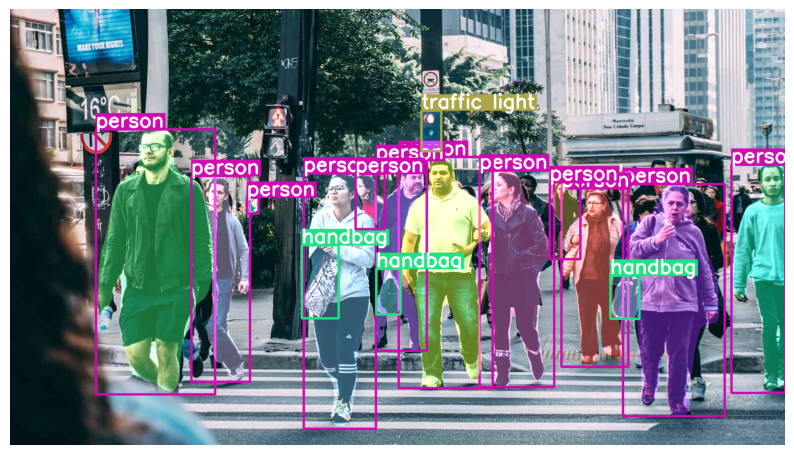

In [29]:
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/mrcnn-crowd.jpg',
    os.path.join(inference_dir, 'mrcnn-crowd.jpg')
)
instance_segmentation_api(os.path.join(inference_dir, 'mrcnn-crowd.jpg'), 0.8)


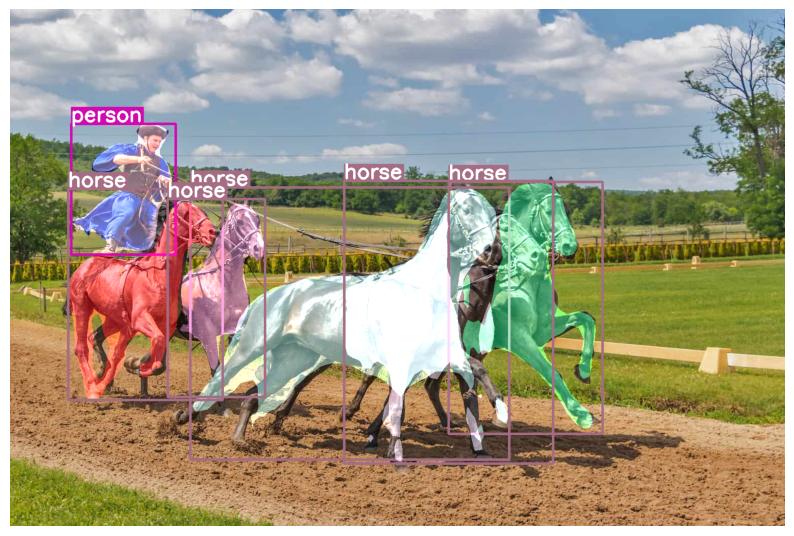

In [30]:
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/mrcnn-horses.jpg',
    os.path.join(inference_dir, 'mrcnn-horses.jpg')
)
instance_segmentation_api(os.path.join(inference_dir, 'mrcnn-horses.jpg'), 0.8)


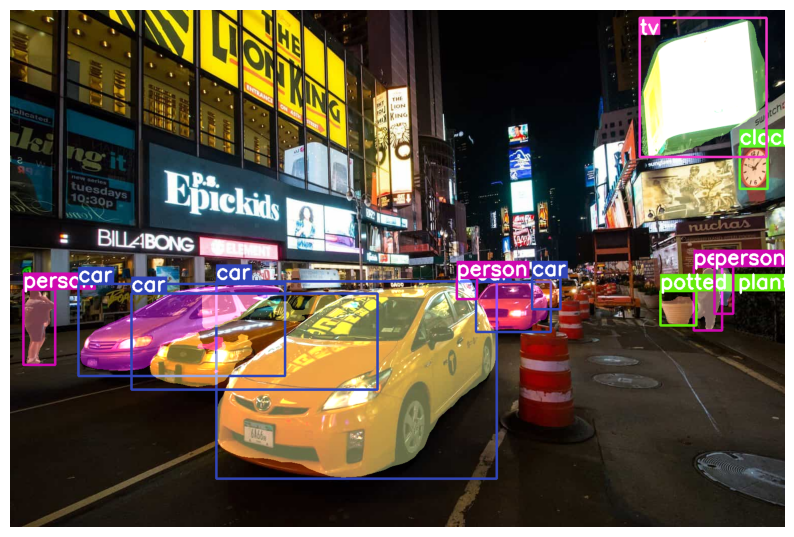

In [31]:
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/mrcnn-low-light.jpg',
    os.path.join(inference_dir, 'mrcnn-low-light.jpg')
)
instance_segmentation_api(os.path.join(inference_dir, 'mrcnn-low-light.jpg'), 0.8)


# Application : Background Blurring

In [35]:
download_file(
    'https://learnopencv.com/wp-content/uploads/2022/10/person_blur.jpg',
    inference_dir + '/person_blur.jpg'
)

In [34]:
def pick_person_mask(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  masks, boxes, pred_cls = get_preditions(img_path, threshold)

  person_ids  = [i for i in range(len(pred_cls)) if pred_cls[i]=="person"]
  person_masks = masks[person_ids, :,:]

  person_mask = person_masks.sum(axis=0)
  person_mask = np.clip(person_mask,0,1)
  return person_mask

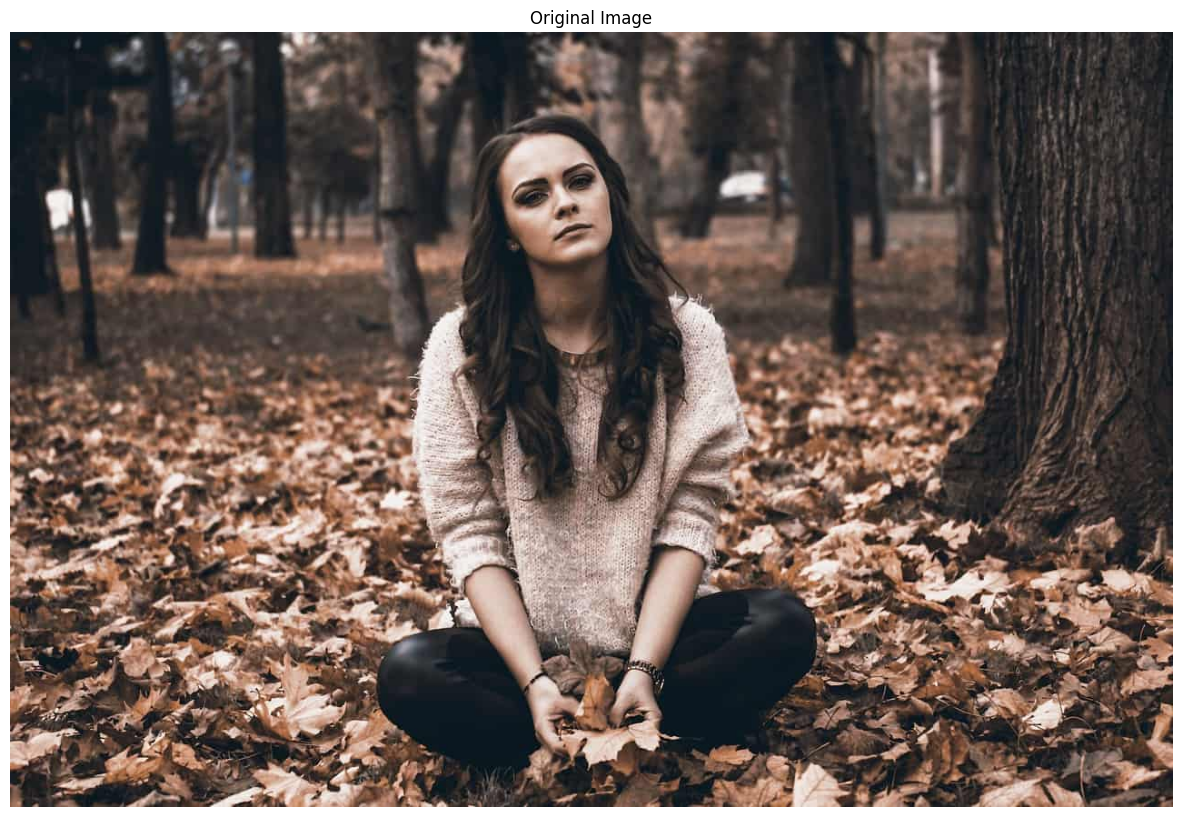

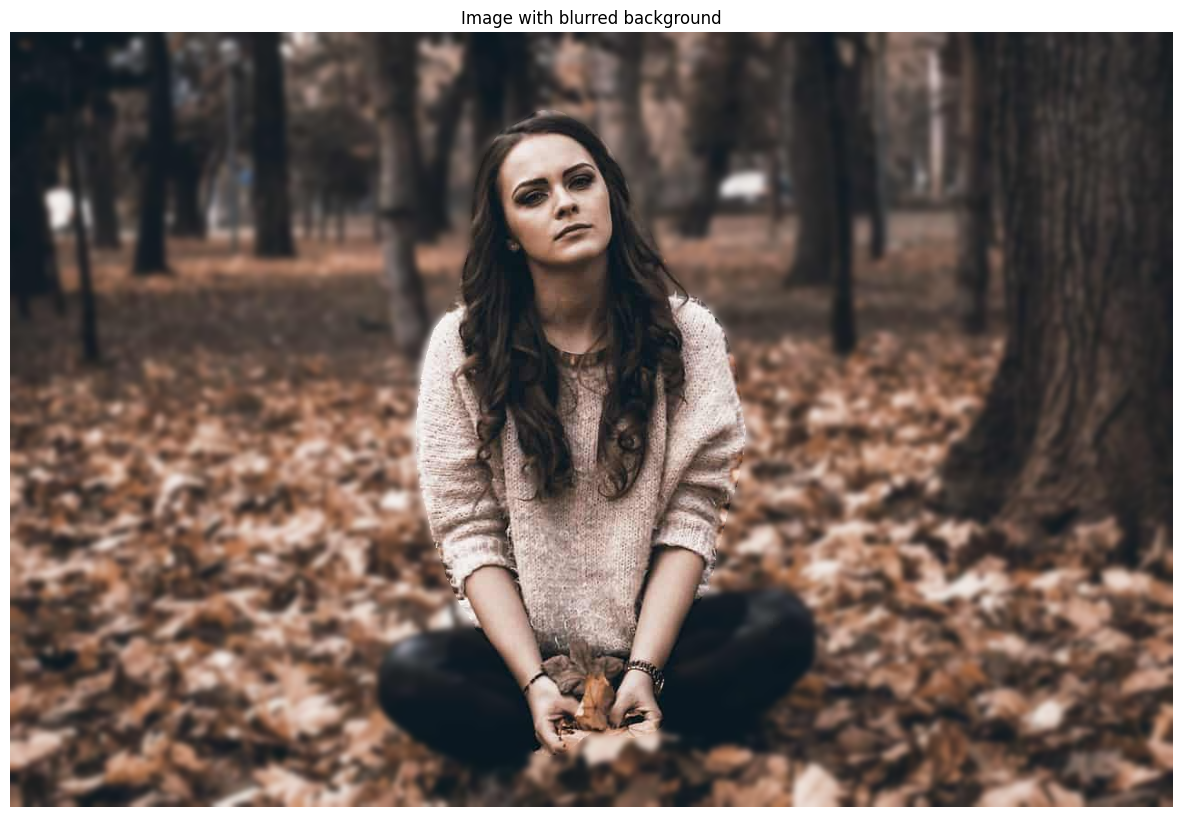

In [38]:
img_path = inference_dir + '/person_blur.jpg'
img = cv2.imread(img_path)
img_blur = cv2.GaussianBlur(img, (21, 21), 0)

person_mask = pick_person_mask(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3).astype(np.uint8)
person_mask = np.repeat(person_mask[:, :, None], 3, axis=2)

final_img = np.where(person_mask==1, img, img_blur)


plt.figure(figsize=(15, 12))
# plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
plt.axis('off')
plt.show()
# plt.subplot(122)
plt.figure(figsize=(15, 12))
plt.imshow(final_img[:,:,::-1])
plt.title('Image with blurred background')
plt.axis('off')
plt.show()